# Deep Learning Major Task
## CNN Leaf Classification

<ol>
  <li><a href="#overview">Overview</a></li>
  <li><a href="#part1">Part I: Data Preparation</a>
    <ol>
      <li><a href="#lookatdata">Describe the Data</a></li>
      <li><a href="#clean-the-data">Clean the Data</a></li>
      <li><a href="#check-for-missing-values-and-duplicates">Check for Missing Values and Duplicates</a></li>
      <li><a href="#visualize-the-data">Visualize the Data</a></li>
      <li><a href="#draw-images">Draw Images</a></li>
      <li><a href="#correlation-analysis">Correlation Analysis</a></li>
      <li><a href="#divide-the-data">Divide the Data</a></li>
      <li><a href="#standardize-the-data">Standardize the Data</a></li>
      <li><a href="#encode-the-labels">Encode the Labels</a></li>
    </ol>
  </li>
  <li><a href="#training-a-neural-network">Part II: Training a Neural Network (CNN)</a>
    <ol>
      <li><a href="#implement-a-cnn-model">Implement a CNN Model</a></li>
      <li><a href="#write-training-function">Write Training Function</a></li>
      <li><a href="#explore-hyperparameter-settings">Explore Hyperparameter Settings</a></li>
      <li><a href="#tensorboard-monitoring">TensorBoard Monitoring</a></li>
      <li><a href="#evaluation-function">Evaluation Function</a></li>
    </ol>
  </li>
</ol>

<h3>Description</h3>
<a id="description"></a>

### First lets write our imports

In [42]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Part I: Data Preparation
<a id="part1"></a>

<h2>Taking a look and Describing the data</h2>
<a id="lookatdata"></a>

### Training dataset

In [43]:
# Load the training set
train_df = pd.read_csv(r'.\data_files\train.csv')

print("#-----> First 5 rows of the training set:\n")
train_df.head(5)

#-----> First 5 rows of the training set:



,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [44]:
print("-----> training set description:")
train_df.describe()

-----> training set description:


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [45]:
print("-----> training set information")
train_df.info()

-----> training set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [46]:
print("-----> training set value types")
train_df.dtypes

-----> training set value types


id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 194, dtype: object

### Testing dataset

In [47]:
# Load the testing set
test_df = pd.read_csv(r'.\data_files\test.csv')

print("#-----> First 5 rows of the testing set:")
test_df.head(5)

#-----> First 5 rows of the testing set:


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [48]:
print("-----> testing set description:")
test_df.describe()

-----> testing set description:


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [49]:
print("-----> testing set information")
test_df.info()

-----> testing set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [50]:
print("-----> testing set value types")
test_df.dtypes

-----> testing set value types


id             int64
margin1      float64
margin2      float64
margin3      float64
margin4      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 193, dtype: object

<h2>Cleaning the data</h2>

### Checking the data for missing values or duplicates and carrying out proper correction methods

In [51]:
# Check for missing values
print("Missing values:\n", train_df.isnull().sum(), "\n")

# Check for duplicates
print("Duplicate values:\n", train_df.duplicated().sum())


Missing values:
 id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64 

Duplicate values:
 0


### ----> Looks like we don't have any missing or duplicate values

Before we continue lets setup our data by dropping the the id and species from the features and set the target on species

In [52]:
# Exclude 'id' and 'species' columns
X_features = train_df.drop(['id', 'species'], axis=1)
y_target = train_df['species']

## Visualizing the data

ValueError: num must be 1 <= num <= 9, not 10

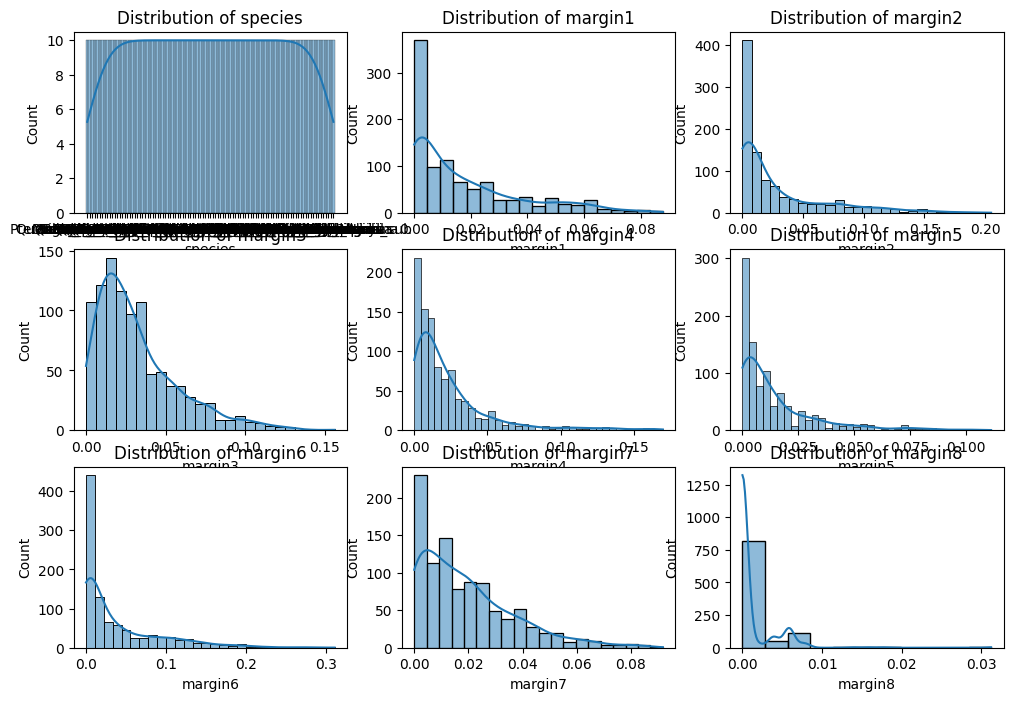

In [54]:
# Feature Distributions
features = train_df.iloc[:, 1:]  # Assuming features start from column 2
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# # Visualization 3: Pairwise Feature Scatter Plots
# sns.pairplot(train_df.sample(500), hue='species', diag_kind='kde')
# plt.suptitle('Pairwise Scatter Plots for Features', y=1.02)
# plt.show()

In [ ]:
# Dimensionality Reduction Visualization (using PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=train_df['species'])
plt.title('PCA Visualization')
plt.show()

KeyError: 'species'

<Figure size 1000x600 with 0 Axes>

### Let's display some leaf images from the training set

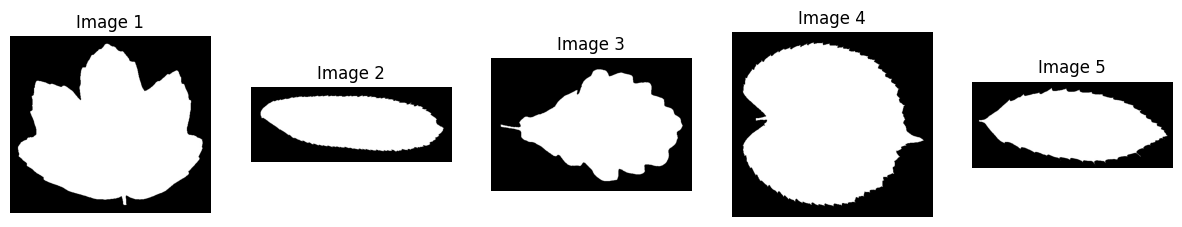

In [ ]:
from PIL import Image
import os

image_dir = '.\data_files\images'
image_ids = train_df['id'].head(5).tolist() 

plt.figure(figsize=(15, 8))

for i, image_id in enumerate(image_ids, 1):
    image_path = os.path.join(image_dir, f"{image_id}.jpg")
    image = Image.open(image_path).convert('RGB')

    plt.subplot(1, 5, i)
    plt.imshow(image)
    plt.title(f"Image {i}")
    plt.axis('off')

plt.show()


<h2>Correleation Analysis </h2>

we are going to calculate the correlation matrix for shape features<br>
we will use heatmap


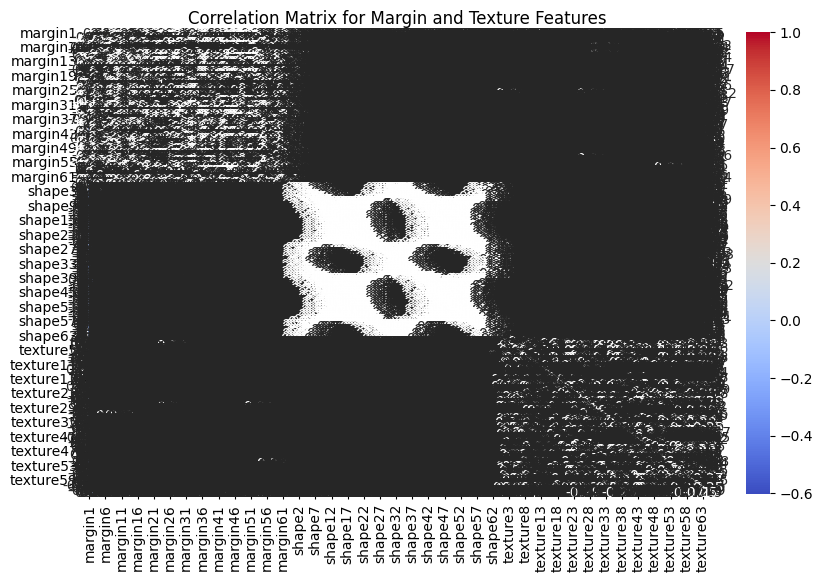

In [55]:
# Extracting columns related to 'margin' and 'texture'
margin_texture_columns = train_df.loc[:, 'margin1':'texture64']

# Calculate correlation matrix for 'margin' and 'texture' features
correlation_matrix_margin_texture = margin_texture_columns.corr()

# Display heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_margin_texture, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Margin and Texture Features')
plt.show()


### Deciding which split method to use

#### We got two methods for splitting:
<ol>
<li>train_test_split</li>
<li>StratifiedShuffleSplit (sss)</li>
</ol>

<b>train_test_split:</b></br>
Usage: Commonly used for general train-test splitting, especially when the class distribution is not a significant concern.<br>
How it works: Randomly shuffles and splits the data into training and test sets.<br>
Advantage: Simplicity and ease of use. Suitable for well-balanced datasets.<br>

<b>StratifiedShuffleSplit:</b></br>
Usage: Typically used when you want to ensure that the distribution of classes in both the training and validation sets is representative of the overall distribution in the dataset.<br>
How it works: StratifiedShuffleSplit maintains the class distribution when creating random splits. It shuffles the data and then creates splits, ensuring that each split has a similar class distribution.<br>
Advantage: Useful when dealing with imbalanced datasets where certain classes have significantly fewer samples than others.<br>

If the dataset has a <b>balanced</b> class distribution, and just need a simple split, train_test_split is often sufficient and easier to use.<br>

If the dataset has <b>imbalanced</b> classes, and want to ensure that the class distribution is maintained in both training and validation sets, then StratifiedShuffleSplit is a good choice.<br>

To decide which approach is better the dataset, we can can check the distribution of the 'species' column in our dataset.

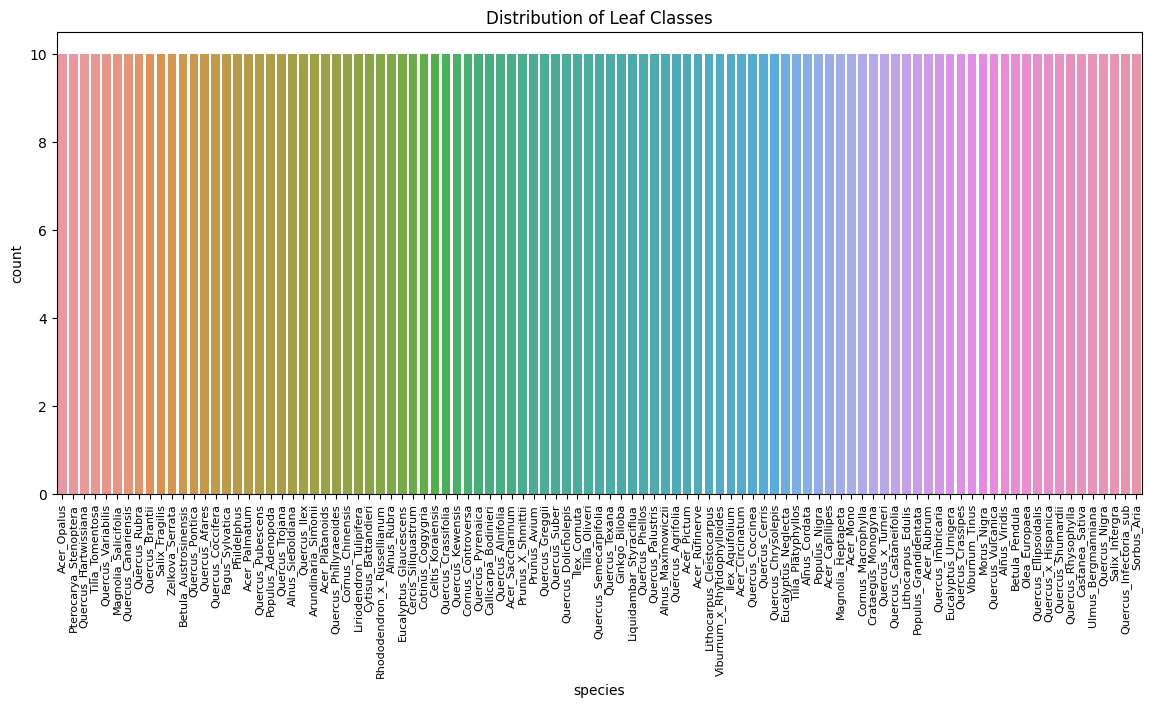

In [61]:
plt.figure(figsize=(14, 6))
sns.countplot(x='species', data=train_df)
plt.title('Distribution of Leaf Classes')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.show()

-----> since all the bars are the same height that means its balanced and we can use the regular train_test_split method

<h2>Train/Test split</h2>
Divide the data into a training and testing set using approximately 80% for training

In [57]:
# test_size = 0.2 meaning that the training set will be 0.8 (80%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

<h2>Data Standardization</h2>

In [58]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Label Encoding</h2>

In [59]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

<h1>Part II: Training the Neural Network</h1>